# Disciplina de Machine Learning Modelos Supervisionados Modernos
# Marcelo Santos da Silva
## Trabalho 2 - Diversos Modelos

## Medical Insurance Payout
https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout







### Para criar o modelo, vamos seguir as etapas:
#### 1. Preparação dos dados
#### 2. Análise dos dados
#### 3. Preprocessamento dos dados
#### 4. Desenvolvimento do modelo de machine learning
#### 5. Análise final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import set_config
set_config(display='diagram')

In [2]:
%notebook matplotlib
from warnings import filterwarnings
filterwarnings('ignore')

## Etapa 1 - Preparação os dados

Há apenas um arquivo disponbilizado (expenses.csv) contendo os dados necessários, expenses.csv.
<br>A partir deste serão gerados os arquivos de treino e teste do modelo.



In [3]:
#Criando dataframe para manipulação dos dados
df=pd.read_csv('../data/expenses.csv')

In [4]:
# Visualizando os dados 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Descrição das Features / Atributos:

* __age__:	Idade do cliente
* __sex__:	Gênero
* __bmi__:	Índice de massa corportal (IMC)
* __children__:	Número de filhos
* __smoker__:	Se é fumante ou não
* __region__:	Região do país onde vive
* __charges__:	Variável target, a despesa do cliente

### 1.1 - Informações dos Dados

In [5]:
# Verificando tamanho do dataset (linhas e colunas)
print('df_shape:', df.shape)


df_shape: (1338, 7)


Há 1.338 linhas e 7 colunas no dataset

In [6]:
#Analisando informações básicas do dataset 
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
# Describe do dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Etapa 2 - Análise dos dados

### 2.1 - Correlação entre os atributos numéricos


Text(0.5, 1.0, 'Triangle')

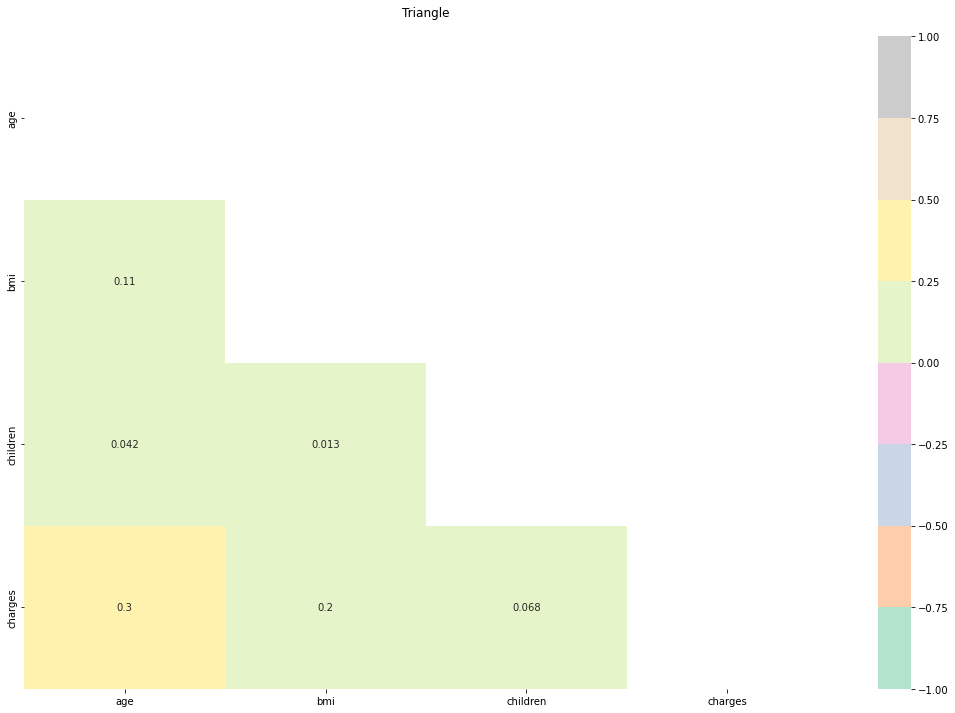

In [8]:

fig,ax=plt.subplots(1,1,figsize=(18,12))
mask=np.triu(np.ones_like(df.corr()))
heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,mask=mask,cmap='Pastel2',annot=True)
heatmap.set_title('Triangle',fontdict={'fontsize':12},pad=20)

Há alguma correlação entre as variáveis "age" e "charges" e também entre "bmi" e "charges", porém, não muito alta.
<br>Esta informação pode ser útil mais tarde na análise dos resultados e/ou tuning do modelo.

### 2.2 - Distribuição dos atributos categóricos

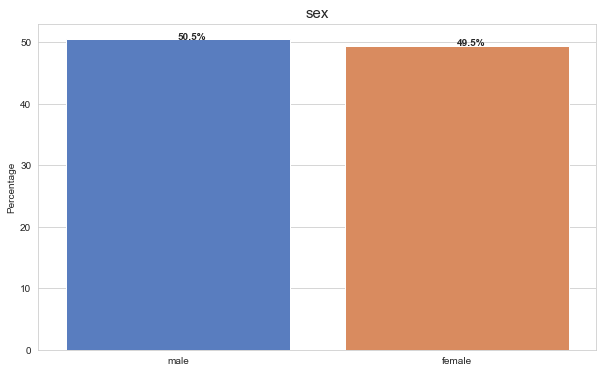

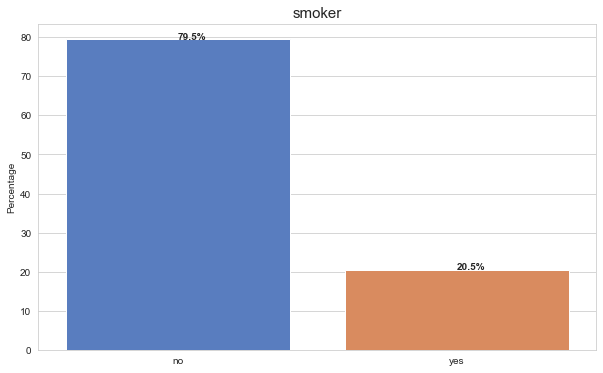

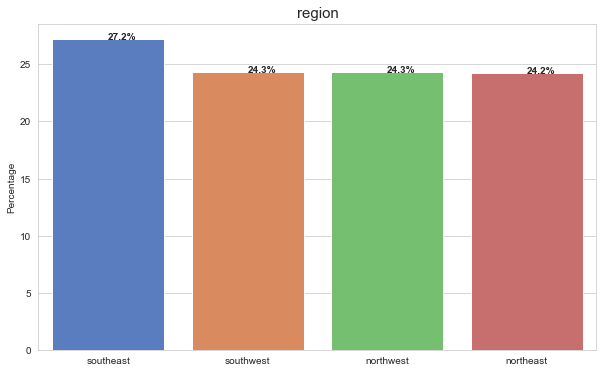

In [9]:
cat_columns=['sex','smoker','region']

colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
for i,c in enumerate(cat_columns):
    df_per = pd.concat([df[c].value_counts(), df[c].value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=df_per.index, y='percentage', data=df_per, ci=None, palette="muted",orient='v', )
    ax.set_title(c, fontsize=15)
    ax.set_ylabel ("Percentage")
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

    

Análise:
- sex: há praticamente igualdade na distribuição
- smoker: a grande maioria é de <i>não fumantes</i>
- region: distribuição similar, com exceção de <i>southeast</i>, um pouco mais alto que os demais

### 2.3 - Análise Multivariada

Vamos analisar a segregação entre os aributos categóricos e os demais atributos

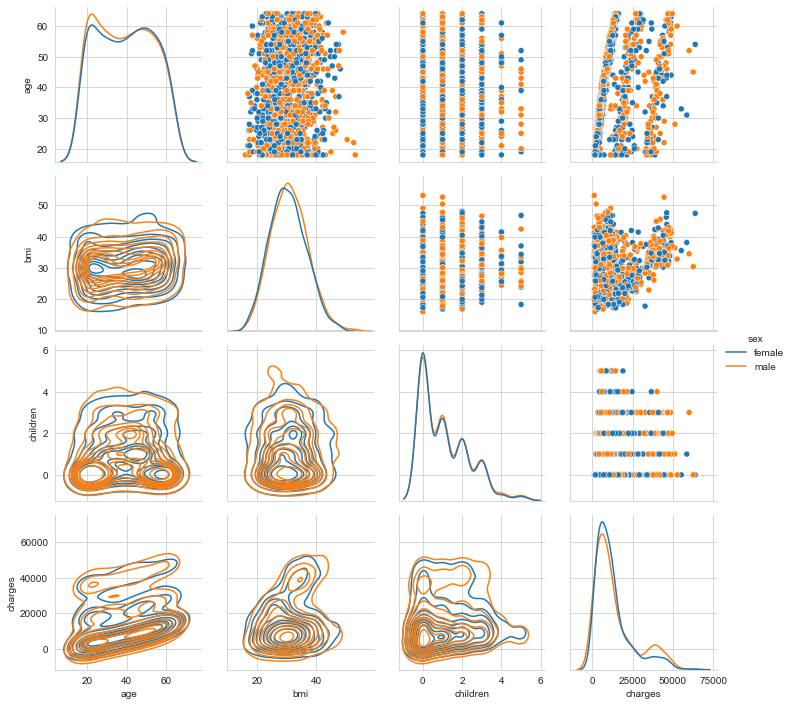

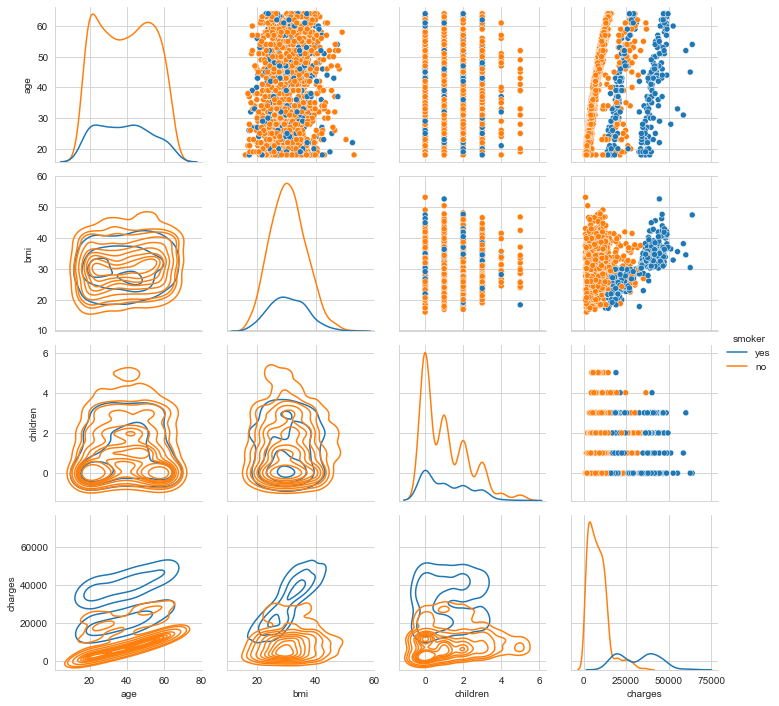

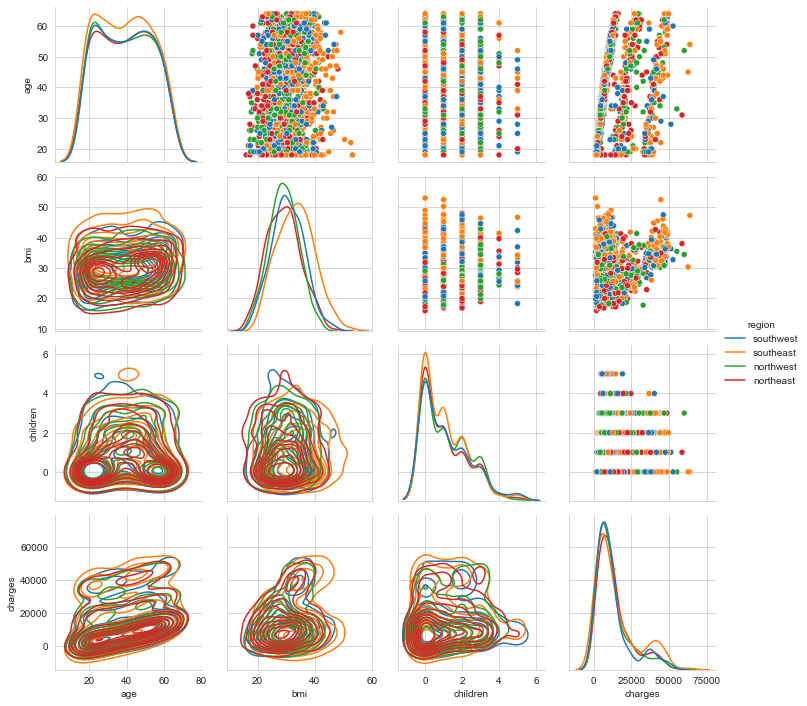

In [10]:
cat_columns=['sex','smoker','region']

for i,c in enumerate(cat_columns):
    
    g = sns.PairGrid(df, diag_sharey=False, hue=c)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot)
    g.add_legend()



Análise:
- Ao segregarmos os dados por "sex", não parece haver grandes diferenças entre os atributos.

- Ao segregramos os dados por "smoker", observa-se:
    - as despesas (charges) são maiores entre os fumantes
    - quanto maior o bmi, maiores as despesas entre os fumantes


- Ao segregramos os dados por "region", é mais difícil visualizar as diferenças devido à quantidade de valores no domínio (4). Para este caso, talvez fosse melhor empregrar outra técnica.

## Etapa 3 - Pré processamento dos dados

### 3.1 - Valores ausentes e duplicados

In [11]:
# Verificando quantidade de valores ausentes nos dados de treino
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Não há valores ausentes no dataset.

In [12]:
# Verificando valores duplicados nos dados 
df[df.duplicated() == True]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Existe apenas um valor "duplicado" no dataset. Pode ser ou não um erro na coleta dos dados. 
<br> Por questão de simplicidade, vamos deletá-lo do dataset


In [13]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape


(1337, 7)

### 3.2 - Tratamento dos dados

Nas aulas, foi apresentada a funcionalidade do pipeline, porém, optei por realizar as etapas "segregadas", por ser mais didático e para ter maior controle do passo a passo.

In [14]:
var_cat = ['sex', 'smoker', 'region']
var_num = ['age', 'bmi', 'children']

### 3.2.1 - Tratamento dos valores ausentes com SimpleImputer

In [15]:
#Tratamento das variáveis numéricas
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(df[var_num])
df[var_num] = imputer.transform(df[var_num])
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50.0,male,30.970,3.0,no,northwest,10600.54830
1333,18.0,female,31.920,0.0,no,northeast,2205.98080
1334,18.0,female,36.850,0.0,no,southeast,1629.83350
1335,21.0,female,25.800,0.0,no,southwest,2007.94500


In [16]:
#Tratamento das variáveis categóricas
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(df[var_cat])
df[var_cat] = imputer.transform(df[var_cat])
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50.0,male,30.970,3.0,no,northwest,10600.54830
1333,18.0,female,31.920,0.0,no,northeast,2205.98080
1334,18.0,female,36.850,0.0,no,southeast,1629.83350
1335,21.0,female,25.800,0.0,no,southwest,2007.94500


### 3.2.2 - Codificação dos atributos categóricos com OneHotEnconder



In [17]:
cat_cols_encoded = []
for col in var_cat:
  cat_cols_encoded += [f"{col[0:3]}_{cat}" for cat in list(sorted(df[col].unique()))[1:]] #exclui a primeira coluna, pois no OneHotEncoder vai utilizar a opção drop='first'
cat_cols_encoded


['sex_male', 'smo_yes', 'reg_northwest', 'reg_southeast', 'reg_southwest']

In [18]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore',drop='first')
encoded_cols = oh_encoder.fit_transform(df[var_cat])
df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
df_enc


,sex_male,smo_yes,reg_northwest,reg_southeast,reg_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1332,1.0,0.0,1.0,0.0,0.0
1333,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,0.0,1.0


In [19]:
df_oh = pd.concat([df,df_enc], axis=1)
df_oh


,age,sex,bmi,children,smoker,region,charges,sex_male,smo_yes,reg_northwest,reg_southeast,reg_southwest
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18.0,male,33.770,1.0,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28.0,male,33.000,3.0,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32.0,male,28.880,0.0,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50.0,male,30.970,3.0,no,northwest,10600.54830,1.0,0.0,1.0,0.0,0.0
1333,18.0,female,31.920,0.0,no,northeast,2205.98080,0.0,0.0,0.0,0.0,0.0
1334,18.0,female,36.850,0.0,no,southeast,1629.83350,0.0,0.0,0.0,1.0,0.0
1335,21.0,female,25.800,0.0,no,southwest,2007.94500,0.0,0.0,0.0,0.0,1.0


### 3.2.3 - Scaling com MinMaxScaler

In [20]:
df_scaled = df_oh.copy()
scaler = MinMaxScaler()
df_scaled[var_num] = pd.DataFrame(scaler.fit_transform(df_scaled[var_num]), columns=var_num)
df_scaled.head()


,age,sex,bmi,children,smoker,region,charges,sex_male,smo_yes,reg_northwest,reg_southeast,reg_southwest
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0


### 3.3 - DF Final Pré-Processado

In [21]:
df_preprocessed = df_scaled.drop(var_cat, axis=1)
df_preprocessed

,age,bmi,children,charges,sex_male,smo_yes,reg_northwest,reg_southeast,reg_southwest
0,0.021739,0.321227,0.0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1725.55230,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,4449.46200,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,10600.54830,1.0,0.0,1.0,0.0,0.0
1333,0.000000,0.429379,0.0,2205.98080,0.0,0.0,0.0,0.0,0.0
1334,0.000000,0.562012,0.0,1629.83350,0.0,0.0,0.0,1.0,0.0
1335,0.065217,0.264730,0.0,2007.94500,0.0,0.0,0.0,0.0,1.0


## Etapa 4 - Desenvolvimento do modelo de machine learning

### 4.1 - Funções de apoio

In [22]:
# função para calcular e apresentar as métricas de treino e teste
def show_metrics (y_train, y_test, y_pred_train, y_pred_test):
    ret = pd.Series({
                        "MSE treino": mean_squared_error(y_train, y_pred_train),
                        "MSE teste": mean_squared_error(y_test, y_pred_test),
                        "RMSE treino": np.sqrt(mean_squared_error(y_train, y_pred_train)),
                        "RMSE teste": np.sqrt(mean_squared_error(y_test, y_pred_test)),
                        "R2-score treino": r2_score(y_train , y_pred_train),
                        "R2-score teste": r2_score(y_test , y_pred_test)                            
                    })

    print(ret.round(2))

### 4.2 - Definição de Teste e Treino

In [23]:
# Determinando recordsets de treino e teste do modelo
Y=df_preprocessed['charges'] #Variável Target
X=df_preprocessed.drop('charges',axis=1) #Variáveis de treino

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42) 

### 4.3 - Implementação do modelo LinearRegression

Considerando a simplicidade do modelo LinearRegression, podemos tomá-lo como baseline para avaliação dos demais.

In [24]:
# teste com parâmetros default
lnr = LinearRegression()
lnr.fit(X_train,y_train)
y_pred_test = lnr.predict(X_test)
y_pred_train = lnr.predict(X_train)

show_metrics (y_train, y_test, y_pred_train, y_pred_test)

MSE treino         35812933.24
MSE teste          38940169.92
RMSE treino            5984.39
RMSE teste             6240.21
R2-score treino           0.74
R2-score teste            0.77
dtype: float64


### 4.4 - Implementação do modelo DecisionTreeRegressor

#### 4.4.1 - DecisionTreeRegressor sem tuning

Vamos executar o modelo com os parâmetros default, sem nenhum tuning

In [25]:
# teste com alguns parâmetros
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)
y_pred_test = dtr.predict(X_test)
y_pred_train = dtr.predict(X_train)

show_metrics (y_train, y_test, y_pred_train, y_pred_test)

MSE treino                0.00
MSE teste          38757591.72
RMSE treino               0.00
RMSE teste             6225.56
R2-score treino           1.00
R2-score teste            0.77
dtype: float64


Considerando o R2 de treino, o modelo está perfeito. Porém, o valor do R2 de teste é bem menor, o que evidencia a ocorrência de overfiting.
Na verdade, o desempenho é até pior que o modelo LinearRegression (!).

#### 4.4.2 - DecisionTreeRegressor com tuning

Vamos realizar um tuning no modelo utilizando o GridSearchCV

In [26]:
dtrt = DecisionTreeRegressor(random_state=42)
parameters={"max_depth" : [1,5,10,100,None],
            "min_samples_leaf":[1,5,10,20,30,40,50],
            "max_leaf_nodes":[5,15,20,30,40,50],
            'criterion': ['squared_error']}
dtr_tuning=GridSearchCV(estimator=dtrt, param_grid=parameters)
dtr_tuning.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 5, 10, 100, None],
                         'max_leaf_nodes': [5, 15, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50]})

In [27]:
# verificando melhores parâmetros
dtr_tuning.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 10}

Aplicação do modelo com os melhores parâmetros encontrados pelo GridSearchCV

In [28]:
# testando com melhores parâmetros
dtr = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, random_state=42)
dtr.fit(X_train,y_train)
y_pred_test = dtr.predict(X_test)
y_pred_train = dtr.predict(X_train)

show_metrics (y_train, y_test, y_pred_train, y_pred_test)

MSE treino         17846569.19
MSE teste          21380351.79
RMSE treino            4224.52
RMSE teste             4623.89
R2-score treino           0.87
R2-score teste            0.88
dtype: float64


Agora, com o tuning, houve uma sensível melhora no desempenho do modelo no recordset de teste. E a queda do overfiting.
<br>O desempenho supera o baseline.

### 4.5 - Implementação do modelo RandomForestRegressor

#### 4.5.1 - RandomForestRegressor sem tuning

Vamos executar o modelo com os parâmetros default, sem nenhum tuning

In [29]:
rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_train,y_train)
y_pred_test = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

show_metrics (y_train, y_test, y_pred_train, y_pred_test)

MSE treino          3527883.60
MSE teste          23268850.26
RMSE treino            1878.27
RMSE teste             4823.78
R2-score treino           0.97
R2-score teste            0.86
dtype: float64


Em comparação com o modelo DecisionTreeRegressor "tunado", até que o modelo RandomForestRegressor sem "tuning" se saiu bem no teste.
Porém, comparando o R2 de teste e treino, está claramente overfitado.

#### 4.5.2 - RandomForestRegressor com tuning

Vamos realizar um tuning no modelo utilizando o GridSearchCV

In [30]:
rfrt = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [1,5,10,50],    
    'min_samples_leaf': [1,5,10,20,30,40,50],    
    'max_leaf_nodes':[5,10,30,50],
    'n_estimators': [100, 200, 300, 500],
    'criterion': ['squared_error']
}

# Instantiate the grid search model
rfr_tuning = GridSearchCV(estimator=rfrt, param_grid=param_grid)
rfr_tuning.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 5, 10, 50],
                         'max_leaf_nodes': [5, 10, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50],
                         'n_estimators': [100, 200, 300, 500]})

In [31]:
# verificando melhores parâmetros
rfr_tuning.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5,
 'n_estimators': 500}

Aplicação do modelo com os melhores parâmetros encontrados pelo GridSearchCV

In [32]:
# testando com melhores parâmetros
rfr = RandomForestRegressor(max_depth=5, max_leaf_nodes=30, min_samples_leaf=10, n_estimators=500, random_state=42)
rfr.fit(X_train,y_train)
y_pred_test = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

show_metrics (y_train, y_test, y_pred_train, y_pred_test)

MSE treino         16915881.31
MSE teste          21255216.31
RMSE treino            4112.89
RMSE teste             4610.34
R2-score treino           0.88
R2-score teste            0.88
dtype: float64


Após o tuning, eliminamos o overfiting e ainda houve uma melhora na performance do recordset de teste (até mesmo o RMSE caiu.)
<br> Uma observação importante: o tempo de execução do GridSearchCV para este modelo levou 15min. Muito mais tempo em comparação ao modelo DecisionTreeRegressor.
Em bases de dados maiores, isso pode vir a ser um problema.


## Etapa 5 - Análise final

Entre todos os modelos, o RandomForestRegressor "tunado" apresentou o melhor desempenho, considerando-se o R2. Porém, muito próximo do modelo DecisionTreeRegressor "tunado" (88 contra 87).

Por outro lado, o RandomForestRegressor consumiu muito tempo para obtenção dos melhores parâmetros com o GridSearch.
<br>Em bases maiores, talvez a utilização do GridSearch (conforme já citado) fosse inviável para este modelo, o que obrigaria a utilização de alguma outra técnica para obter os melhores parâmetros.

Considerando que o modelo DecisionTreeRegressor é mais simples e mais "explicativo" que o modelo RandomForestRegressor, em uma situação real, talvez fosse aconselhável a sua utilização, ainda que com uma pequena perda de performance.

Para isso também seria necessário verificar se é possível melhorar o tuning dos dois modelos para uma conclusão final.
